## <font color=orange>**Credit EDA Case Study**</font>

### <font color=orange>**Business Objectives**</font>

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the required libraries
import numpy as np , math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns',500)

pd.set_option('display.max_rows',500)

In [2]:
# Reading dataset
df= pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# Checking shape of dataset
df.shape

(307511, 122)

**<font color=orange>This dataset for application data has:**

- <font color=orange>**307511 rows**</font>
- <font color=orange>**122 columns**</font>

In [4]:
#Getting data types of all the columns
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

**<font color = orange>We can see that there are:**</font>
- **<font color = orange>65 columns with dtype = float64**</font>
- **<font color = orange>41 columns with dtype = int64**</font>
- **<font color = orange>16 columns with dtype = object</font>**

In [5]:
# Getting Info of the df
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [6]:
# Describing the df
df.describe(include= 'all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

#### <font color=orange>Identifying missing values in each column</font>

In [7]:
#Function to calculate data to identify % of data is missing in each column
def meta_data(data):
    total = data.isnull().sum()
    percent = round((data.isnull().sum()/data.shape[0]*100), 2)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, 
                     keys=['Total', 'Null Percent', 'Unique', 'Data_Type']).sort_values(by="Total", ascending=False)

In [8]:
#calculating meta-data for df
df_meta_data = meta_data(df)
df_meta_data

,Total,Null Percent,Unique,Data_Type
COMMONAREA_MEDI,214865,69.87,3202,float64
COMMONAREA_AVG,214865,69.87,3181,float64
COMMONAREA_MODE,214865,69.87,3128,float64
NONLIVINGAPARTMENTS_MODE,213514,69.43,167,float64
NONLIVINGAPARTMENTS_AVG,213514,69.43,386,float64
NONLIVINGAPARTMENTS_MEDI,213514,69.43,214,float64
FONDKAPREMONT_MODE,210295,68.39,4,object
LIVINGAPARTMENTS_MODE,210199,68.35,736,float64
LIVINGAPARTMENTS_AVG,210199,68.35,1868,float64
LIVINGAPARTMENTS_MEDI,210199,68.35,1097,float64


#### <font color=orange>Checking Imbalance of Target Variable for the dataset</font>

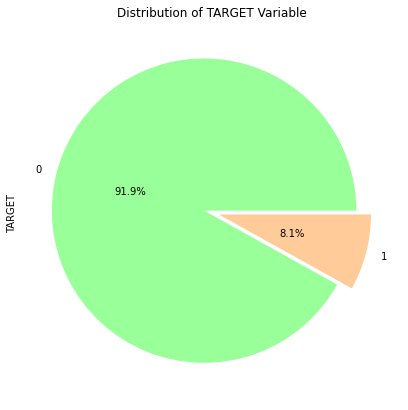

In [9]:
# Distribution of TARGET Variable
plt.figure(figsize = (7,7))
colors = ['#99ff99','#ffcc99']
df['TARGET'].value_counts().plot.pie(autopct="%.1f%%",  explode=[0.05]*2, pctdistance=0.5, colors=colors)
plt.title("Distribution of TARGET Variable")
plt.show()

**From this information, we see this is an imbalanced dataset. There are far more loans that were repaid on time than loans that were not repaid.**

**ore than 91.9% loans were repaid, Less than 8.1% loans were not repaid.**

#### <font color=orange>Dropping columns with Missing Values more than 40 %</font>

In [10]:
# Dropping Null columns with percentage more than 40%
null_col= df.isnull().sum()*100/df.shape[0]
null_col= null_col[null_col.values > 40]
print('Length of Columns with missing data more than 40% is: ',len(null_col))
df.drop(columns=null_col.index,inplace=True)
df.shape

Length of Columns with missing data more than 40% is:  49


(307511, 73)

**We dropped 49 colums and now we are left with 73 columns for analysis**

In [11]:
df.describe(include= 'all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,NaN,TUESDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,NaN,248526,158774,218391,196432,272868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55186,NaN,NaN,NaN,53901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,NaN,NaN,NaN,NaN,NaN,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,NaN,2.152665,2.052463,2.031521,NaN,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,NaN,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05

In [12]:
# Sorting null_col in dececnding order
null_col = round(null_col.sort_values(ascending= False),2)

print('Top 5 Columns\n\n',null_col.head())
print('\nBottom 5 Columns\n\n',null_col.tail())

Top 5 Columns

 COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
COMMONAREA_MEDI             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_MEDI    69.43
dtype: float64

Bottom 5 Columns

 YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
dtype: float64


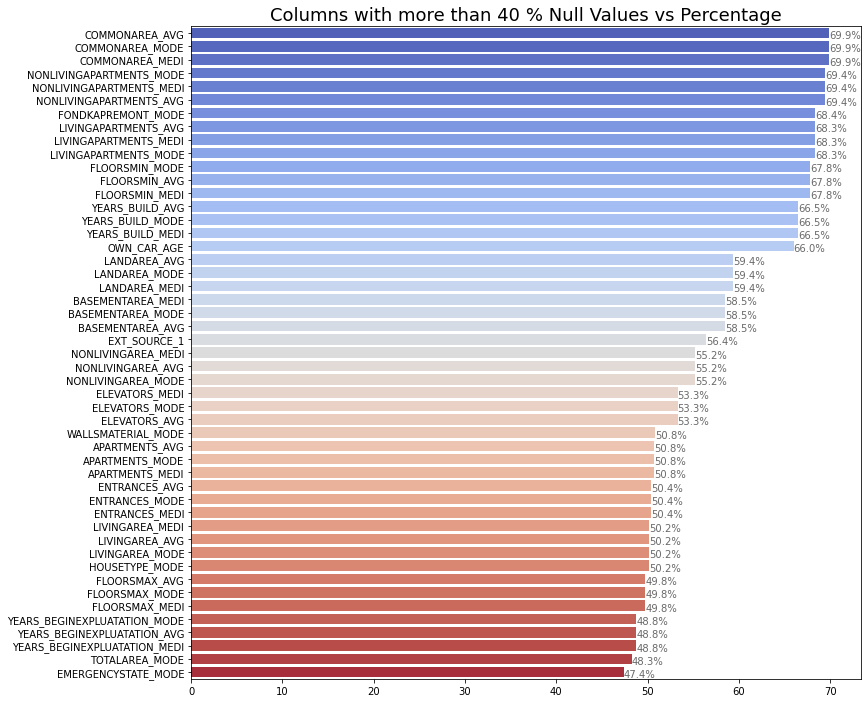

In [13]:
# Visualising the Columns to be droped with more than 40 % NULL values
plt.figure(figsize = (12,12))
ax =sns.barplot( x = null_col,y = null_col.index,palette="coolwarm" )
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() ,"%.1f%%"% rect.get_width(),color= 'dimgrey', fontsize=10)
ax.set_title('Columns with more than 40 % Null Values vs Percentage',fontsize= 18)
plt.show()

In [14]:
# Drop Duplicates if any
df.drop_duplicates(inplace= True)
df.shape

(307511, 73)

**There are no duplicates in this dataset**

In [15]:
# Gathering info on remaining null columns with null values
rem_null_col = df.isnull().sum()
rem_null_col = rem_null_col[rem_null_col.values > 0]
print('No. of columns', len(rem_null_col))
rem_null_col= (rem_null_col/df.shape[0]*100).sort_values()
print(rem_null_col)

No. of columns 18
DAYS_LAST_PHONE_CHANGE         0.000325
CNT_FAM_MEMBERS                0.000650
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
EXT_SOURCE_2                   0.214626
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
NAME_TYPE_SUITE                0.420148
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
EXT_SOURCE_3                  19.825307
OCCUPATION_TYPE               31.345545
dtype: float64


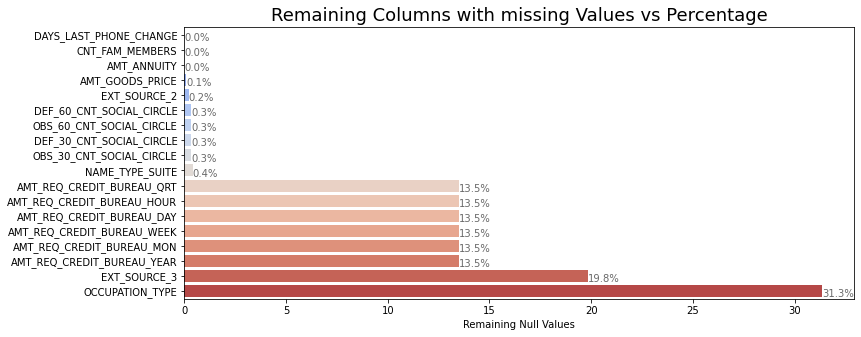

In [16]:
# Visualising the remaining Columns with missing values
plt.figure(figsize = (12,5))
ax = sns.barplot( x = rem_null_col.sort_values(ascending=True),y = rem_null_col.index, palette="coolwarm")
plt.xlabel("Remaining Null Values")
plt.title("")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() ,"%.1f%%"% rect.get_width(), color= 'dimgrey',fontsize= 10)
ax.set_title('Remaining Columns with missing Values vs Percentage',fontsize= 18)
plt.show()

In [17]:
# Checking collums name
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [18]:
# Imputing Missing values with 0

df[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
    'CNT_FAM_MEMBERS']] = df[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                              'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                              'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','CNT_FAM_MEMBERS']].fillna(0)

#### <font color=orange>Explaination for treatment of columns with low missing values</font>

1. AMT_REQ_CREDIT_BUREAU_HOUR
2. AMT_REQ_CREDIT_BUREAU_DAY
3. AMT_REQ_CREDIT_BUREAU_WEEK
4. AMT_REQ_CREDIT_BUREAU_MON
5. AMT_REQ_CREDIT_BUREAU_QRT
6. AMT_REQ_CREDIT_BUREAU_YEAR

**We can impute missing values in these columns above with 0s and assume that no enquiry was made during the time reflected in null rows.**

1. NAME_TYPE_SUITE - we should leave empty values as it is or impute it with "Others A" or "Others B" depending on what they mean.
2. OBS_30_CNT_SOCIAL_CIRCLE & related fields. 
3. EXT_SOURCE_2 
4. AMT_GOODS_PRICE 
5. CNT_FAM_MEMBERS
6. AMT_ANNUITY
7. DAYS_LAST_PHONE_CHANGE


**We should not add any additional info in missing values of these columns above as it would lead to noise and exaggeration.**

#### <font color=orange>Let's take look at all the columns names for different data types </font>

In [19]:
df.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [20]:
df.select_dtypes('float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [21]:
df.select_dtypes('int64').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

**A lot of the int columns look like Flags, let check their unique values**

In [22]:
df.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMEN

**<font color=orange>Notice a lot of "int" columns have 2 unique values. These are flags or Flag type varibles. Which have no use in bivariate analysis. These can be converted to Yes/No values for categorical analysis.</font>**

In [23]:
#Converting columns
two_var_cols=list(df_meta_data[(df_meta_data.Unique==2)&(df_meta_data.Data_Type=="int64")].index)

#Converting columns with 2 unique values to categorical 
def convert_data(df, two_var_cols):
    for i in two_var_cols:
        df.loc[:,i].replace((0, 1), ('N', 'Y'), inplace=True)
    return df

#Converting the target variable back to 'int'
convert_data(df, two_var_cols)
df.TARGET.replace(('N', 'Y'), (0, 1), inplace=True)
df.dtypes.value_counts()

object     44
float64    20
int64       9
dtype: int64

In [24]:
df[['DAYS_BIRTH','DAYS_EMPLOYED',
    'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,4363.988632,141275.766519,3522.886321,1509.450419
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,-7489.000000,365243.000000,0.000000,0.000000


In [25]:
# Converting days to year & dropping the days columns
df[['YEARS_BIRTH','YEARS_EMPLOYED', 
    'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']]= (abs(df[['DAYS_BIRTH','DAYS_EMPLOYED', 
                                                      'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']])//365)
df.drop(labels= ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'], inplace= True, axis=1)

In [26]:
df[['YEARS_BIRTH','YEARS_EMPLOYED', 
    'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   YEARS_BIRTH         307511 non-null  float64
 1   YEARS_EMPLOYED      307511 non-null  float64
 2   YEARS_REGISTRATION  307511 non-null  float64
 3   YEARS_ID_PUBLISH    307511 non-null  float64
dtypes: float64(4)
memory usage: 11.7 MB


In [27]:
df[['YEARS_BIRTH','YEARS_EMPLOYED', 
    'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']].describe()

,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.435968,185.021521,13.168683,7.713474
std,11.954593,381.972190,9.646841,4.134515
min,20.000000,0.000000,0.000000,0.000000
25%,34.000000,2.000000,5.000000,4.000000
50%,43.000000,6.000000,12.000000,8.000000
75%,53.000000,15.000000,20.000000,11.000000
max,69.000000,1000.000000,67.000000,19.000000


There is an outlier here in YEARS_EMPLOYED. The max value is 1000 years which is not practically possible. This might be an error and we can replace this value with null

In [28]:
# Findling median value for YEARS_EMPLOYED
med = df['YEARS_EMPLOYED'].quantile(.5)
med

6.0

In [29]:
# Funtion to impute median with the outlier 
df['YEARS_EMPLOYED'] = df.YEARS_EMPLOYED.apply([lambda x: med if x == 1000 else x])

In [30]:
# Converting the data type to Int64 for ease in visualisation
df[['YEARS_BIRTH','YEARS_EMPLOYED', 
    'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']]= df[['YEARS_BIRTH','YEARS_EMPLOYED', 
                                                    'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']].astype('int64')

In [31]:
# Checking info
df[['YEARS_BIRTH','YEARS_EMPLOYED', 
    'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   YEARS_BIRTH         307511 non-null  int64
 1   YEARS_EMPLOYED      307511 non-null  int64
 2   YEARS_REGISTRATION  307511 non-null  int64
 3   YEARS_ID_PUBLISH    307511 non-null  int64
dtypes: int64(4)
memory usage: 11.7 MB


### <font color=orange>Explaination for treatment of columns with days</font>
**We can clearly say that days columns can't have negative values so using abs() funtion to convert (-) Values to (+) Values.**

**Dividing the days with 365 to convert them into year.**

**Converting data type to integer.**

# <font color=orange> Checking Outliers </font>

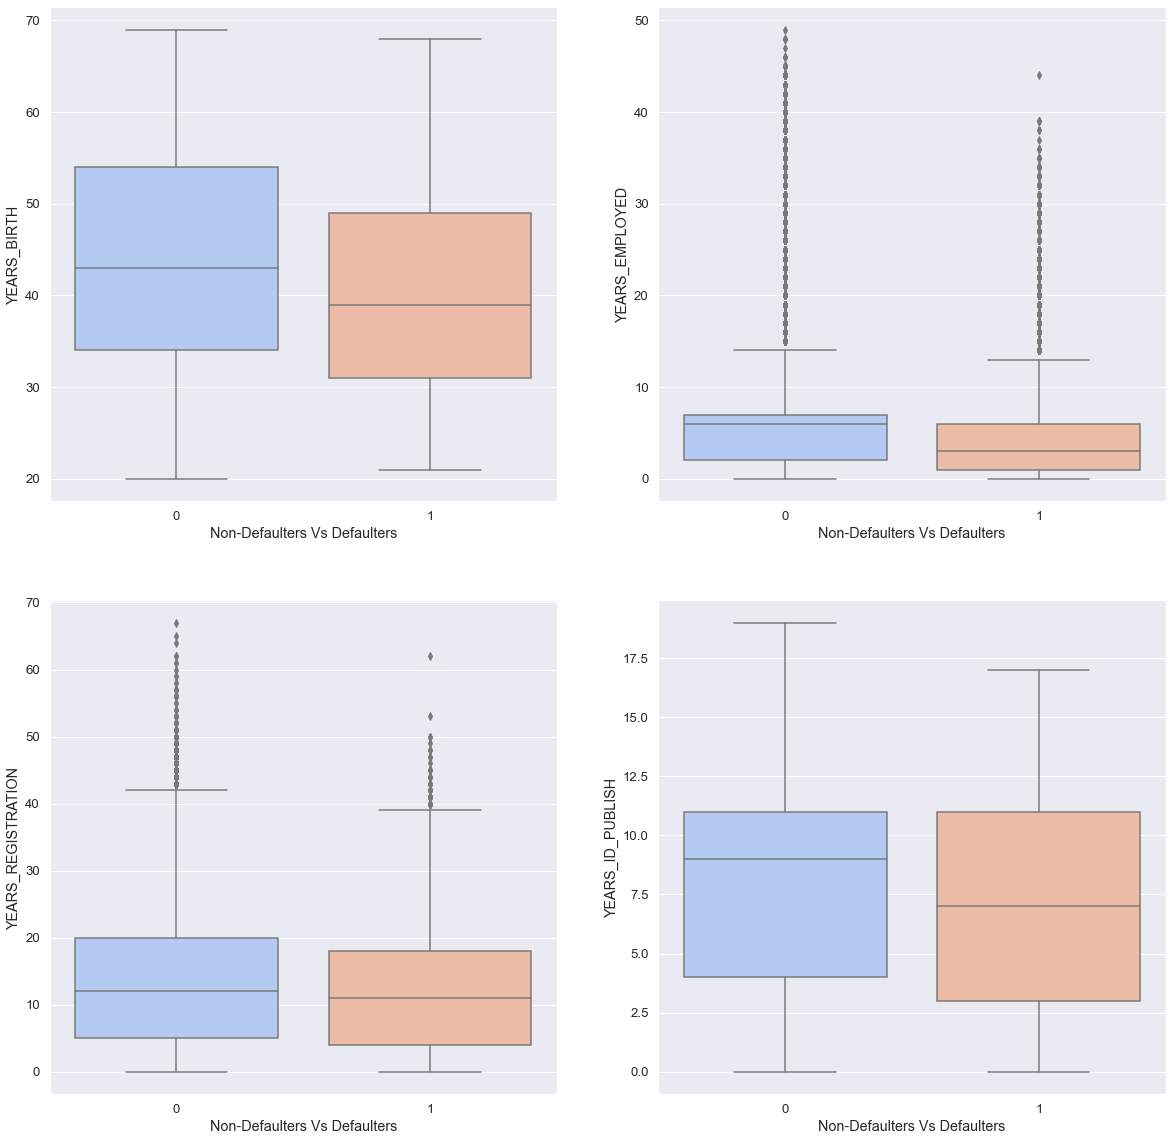

In [32]:
plt.figure(figsize=(20,20)) 
sns.set(font_scale=1.2)
colors = ['#99ff99','#ffcc99']
plt.subplot(2,2,1)
ax= sns.boxplot(data= df, y='YEARS_BIRTH',x='TARGET', palette="coolwarm")
plt.xlabel('Non-Defaulters Vs Defaulters')

plt.subplot(2,2,2)
ax= sns.boxplot(data= df, y='YEARS_EMPLOYED',x='TARGET', palette="coolwarm")
plt.xlabel('Non-Defaulters Vs Defaulters')

plt.subplot(2,2,3)
ax= sns.boxplot(data= df, y='YEARS_REGISTRATION',x='TARGET', palette="coolwarm")
plt.xlabel('Non-Defaulters Vs Defaulters')

plt.subplot(2,2,4)
ax= sns.boxplot(data= df, y='YEARS_ID_PUBLISH',x='TARGET', palette="coolwarm")
plt.xlabel('Non-Defaulters Vs Defaulters')
plt.show()

### <font color=orange>Inferences</font>

**-Years Birth: We can state that more than 50% defaulters have age less than 40Y whereas Non-Defaulters have an average age above 40Y.**

**-Years Employed: The more the experience the less the Defaulters.**

**-Years Registration: Those who had more years of registration tends to be less Defaulters.**

**-Years ID Published: Defaulters seems to change the identity document more frequently.**

In [33]:
# Dividing the dataset into two datasets of target=1(customer with defaults) and target=0(all customer without defaults)
df_non_defaulters = df.loc[df["TARGET"]==0]
df_defaulters = df.loc[df["TARGET"]==1]

In [34]:
# Calculating Imbalance Ratio for non-defaulters vs defaulters
non_defaulters_percent=(len(df_non_defaulters)*100)/len(df)
defaulters_percent=(len(df_defaulters)*100)/len(df)

print("The Percentage of people who have paid their loan is:",round(non_defaulters_percent,2),"%")
print("The Percentage of people who have NOT paid their loan is:",round(defaulters_percent,2),"%")
print("The Ratio of Data Imbalance is:",round(len(df_non_defaulters)/len(df_defaulters),2))

The Percentage of people who have paid their loan is: 91.93 %
The Percentage of people who have NOT paid their loan is: 8.07 %
The Ratio of Data Imbalance is: 11.39


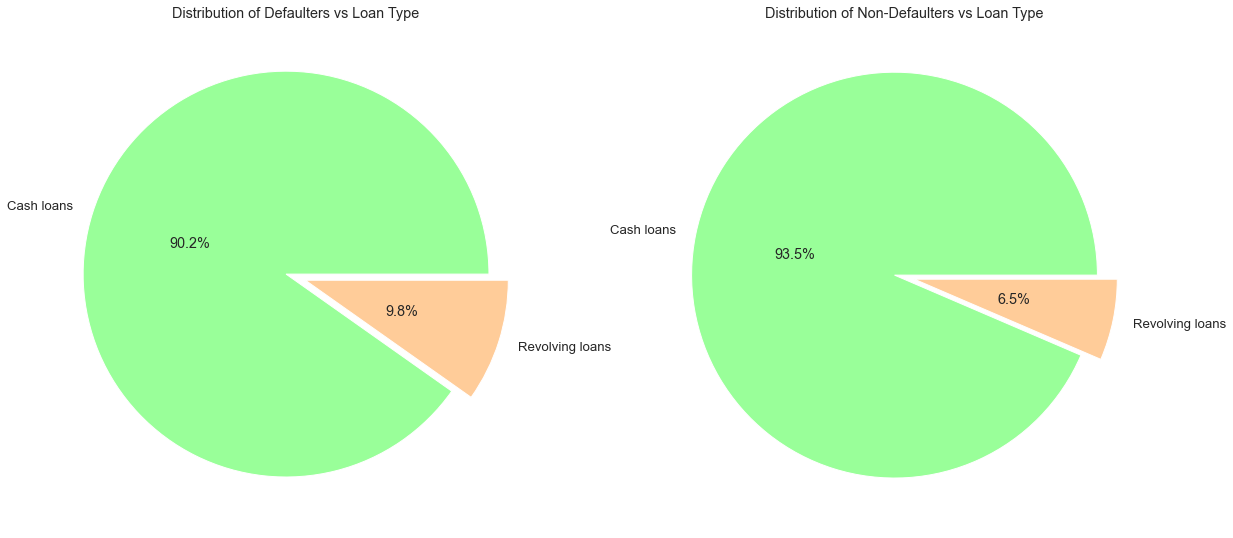

In [35]:
#Defining figure size
plt.figure(figsize=(20,10)) 
sns.set(font_scale=1.2)
plt.title("Distribution of TARGET Variable")
colors = ['#99ff99','#ffcc99']

#Subplot 1
plt.subplot(1,2,1)

#Calling plt 1
ax = df_non_defaulters['NAME_CONTRACT_TYPE'].value_counts().plot.pie(autopct="%.1f%%",  explode=[0.05]*2, pctdistance=0.5, colors=colors)
ax.axes.get_yaxis().set_visible(False)
plt.title("Distribution of Defaulters vs Loan Type")

#Subplot 2
plt.subplot(1,2,2)

#Calling plt 2
ax = df_defaulters['NAME_CONTRACT_TYPE'].value_counts().plot.pie(autopct="%.1f%%",  explode=[0.05]*2, pctdistance=0.5, colors=colors)
ax.axes.get_yaxis().set_visible(False)
plt.title("Distribution of Non-Defaulters vs Loan Type")

plt.show()

**We observe that the number of <font color=orange>Cash loans</font> is much higher than the number of <font color=orange>Revolving loans</font> for both Defaulters and Non-Defaulters**



## Binning Required columns

In [36]:
# Creating bins for age
age_bins = [0,25,30,35,40,45,50,55,60,65,100]
age_group = ['0-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65 and above']
df['AGE_GROUP'] = pd.cut(df['YEARS_BIRTH'],age_bins,labels=age_group, ordered=False)

In [37]:
# Creating bins for income amount
income_bins = [0,50000,100000,150000,200000,250000,
               300000,350000,400000,450000,999999999999]
income_slot = ['0-50K','50K-100K','100K-150K', 
               '150K-200K','200K-250K','250K-300K',
               '300K-350K','350K-400K',
               '400K-450K','450K-above']
df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],income_bins,labels=income_slot,  ordered=True)

In [38]:
df_defaulters.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCL

In [39]:
# User Defined Function for Plots
def with_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.15
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 9)
        ax.set_ylabel('')
        ax.set_yticks([])
    plt.show()

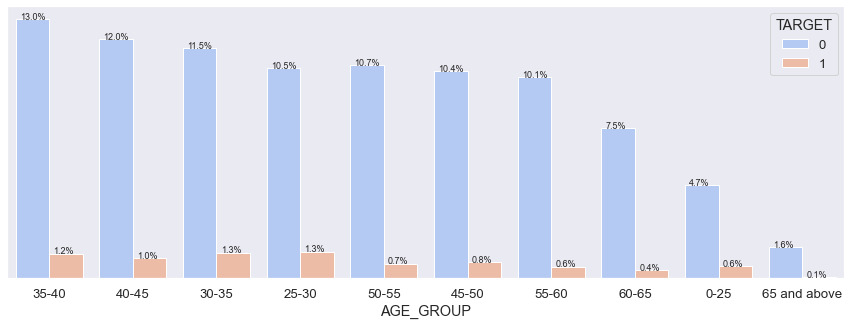

In [40]:
# Plot for Age_group Vs defaulter & Non-defaulters
plt.figure(figsize = (15,5))
ax = sns.countplot(data = df, x= 'AGE_GROUP', order=df['AGE_GROUP'].value_counts().index,hue = "TARGET" ,palette="coolwarm") 
with_hue(ax,df['AGE_GROUP'])
plt.show()

**- A major section of Defaulters belongs between 25-35 Years.**

**- 35-40 Years of age group seems to repay their loans most.**

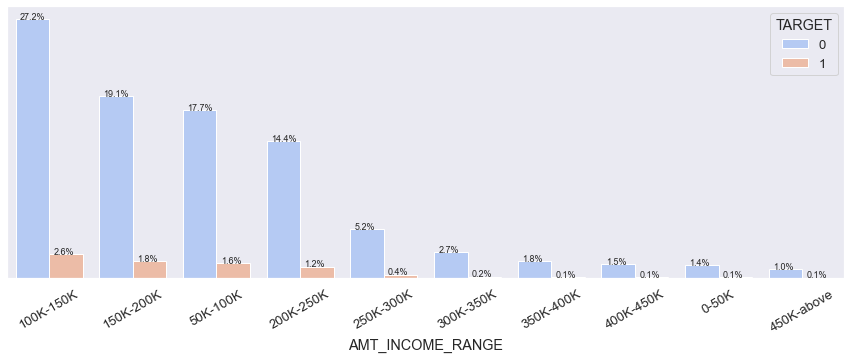

In [41]:
# Plot for Age_group Vs defaulter & Non-defaulters
plt.figure(figsize = (15,5))
plt.xticks(rotation=30)
ax = sns.countplot(data = df, x= 'AMT_INCOME_RANGE', order=df['AMT_INCOME_RANGE'].value_counts().index,hue = "TARGET" ,palette="coolwarm") 
with_hue(ax,df['AMT_INCOME_RANGE'])
plt.show()

**-For Income Range 100K-150K both Defaulters and Non Defaulters holds high chance.**

**-Clients having income more than 450K seems to repay their loan.**

In [42]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [43]:
# Replacing the column 'CODE_GENDER' with "F" for 'XNA' values the dataset
df.CODE_GENDER.replace('XNA','F',inplace= True)
df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

**We can see that <font color=red>XNA</font> values are very less and <font color=red>F</font> values are the highest one so we can Replace <font color=red>XNA</font> with <font color=red>F</font>**



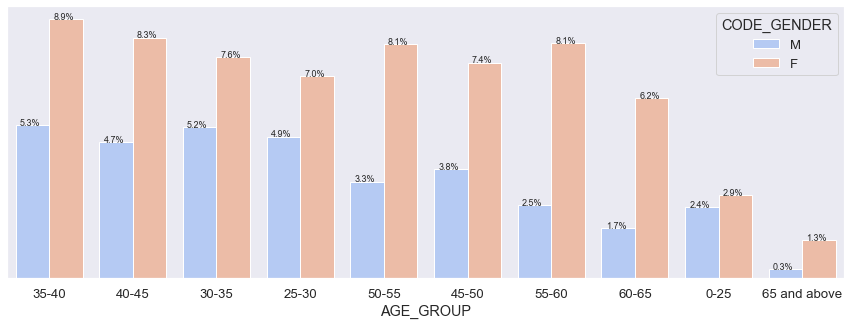

In [44]:
# Plot for Age_group Vs Gender
plt.figure(figsize = (15,5))
ax= sns.countplot(data = df, x= 'AGE_GROUP', order=df['AGE_GROUP'].value_counts().index,hue = "CODE_GENDER" ,palette="coolwarm")
with_hue(ax,df['AGE_GROUP'])
plt.show()

In [45]:
# Reducing the unique variables of ORGANIZATION_TYPE  from 58 to 20

df['ORGANIZATION_TYPE']=df['ORGANIZATION_TYPE'].apply(lambda x:'Industry' if ('Industry') in x else x)
df['ORGANIZATION_TYPE']=df['ORGANIZATION_TYPE'].apply(lambda x:'Transport' if ('Transport') in x else x)
df['ORGANIZATION_TYPE']=df['ORGANIZATION_TYPE'].apply(lambda x:'Trade' if ('Trade') in x else x)
df['ORGANIZATION_TYPE']=df['ORGANIZATION_TYPE'].apply(lambda x:'Business' if ('Business') in x else x) 

org_type=df['ORGANIZATION_TYPE'].unique()
org_type2= ['Business', 'Education', 'Government', 'Religion', 'Other', 'XNA',
       'Utility', 'Medicine', 'Self-employed', 'Services',
       'Industrial', 'Housing', 'Education', 'Trade', 'Industrial',
       'Military', 'Services', 'Government', 'Emergency',
       'Security', 'Education', 'Government', 'Services', 'Agriculture',
       'Restaurant', 'Culture', 'Services', 'Government', 'Services', 'Services',
       'Services', 'Services', 'Services', 'Services', 'Realtor']
df['ORGANIZATION_TYPE'].replace(org_type,org_type2,inplace=True)

In [46]:
# The list income_type having 8 unique values is reduced to 4.

income_type=['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave']
income_type2=['Working', 'Working', 'Working', 'Pensioner',
       'Unemployed', 'Student','Working', 'Maternity leave']

df['NAME_INCOME_TYPE'].replace(income_type,income_type2,inplace=True)

In [47]:
# Reducing the lenth of the unique variavles
edu_type= ['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree']
edu_type2= ['Secondary', 'Higher','Incomplete', 'Lower', 'Academic']
df['NAME_EDUCATION_TYPE'].replace(edu_type,edu_type2,inplace=True)

In [48]:
print('Total Unique values of ORGANIZATION_TYPE :' ,df['ORGANIZATION_TYPE'].nunique())
print('Total Unique values of NAME_INCOME_TYPE :' ,df['NAME_INCOME_TYPE'].nunique())

Total Unique values of ORGANIZATION_TYPE : 20
Total Unique values of NAME_INCOME_TYPE : 5


**Reducing the unique variables of 'ORGANIZATION_TYPE' from 58 to 20 for the ease of visualisation**

**Reducing the unique variables of 'NAME_INCOME_TYPE' from 8 to 4 for the ease of visualisation**

**Shorten the unique variables of 'NAME_EDUCATION_TYPE' for the ease of visualisation**

In [49]:
df.ORGANIZATION_TYPE.isnull().sum()

0

In [50]:
df.ORGANIZATION_TYPE.value_counts()/df.shape[0] * 100

Business         27.488122
XNA              18.007161
Self-employed    12.491260
Industrial        6.839430
Government        5.601751
Education         5.560777
Other             5.425172
Services          5.259324
Trade             4.655118
Medicine          3.639870
Security          1.055897
Housing           0.961917
Military          0.856555
Agriculture       0.798020
Restaurant        0.588922
Utility           0.308932
Emergency         0.182107
Realtor           0.128776
Culture           0.123248
Religion          0.027641
Name: ORGANIZATION_TYPE, dtype: float64

In [51]:
# Updating the dataset
df_non_defaulters = df.loc[df["TARGET"]==0]
df_defaulters = df.loc[df["TARGET"]==1]

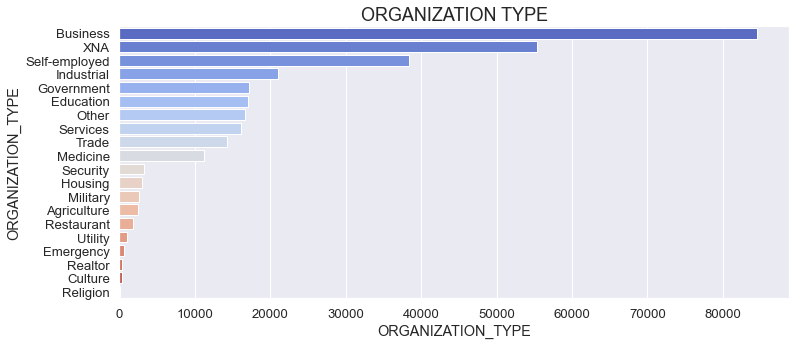

In [52]:
# Value counts of Organization Type
plt.figure(figsize = (12,5))
ax= sns.countplot(data = df, y= 'ORGANIZATION_TYPE', order=df['ORGANIZATION_TYPE'].value_counts().index,palette="coolwarm")
plt.xlabel("ORGANIZATION_TYPE")
ax.set_title('ORGANIZATION TYPE',fontsize= 18)
plt.show()

**We can state that loan applicants of Occupation type Business are highest in number whereas Relegion are the least**

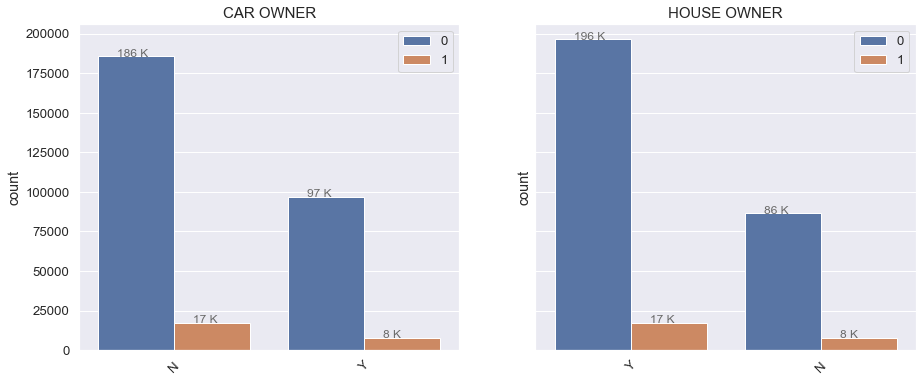

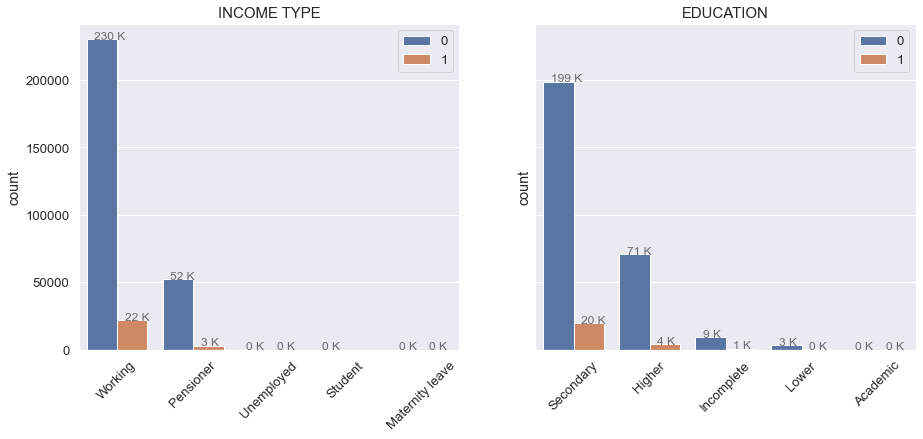

In [53]:

def plot_categorical(ax,x_axis,target,df,annot=True,hdr=''):
    
    my_plot = sns.countplot(x=x_axis, hue="TARGET", data=df,ax=ax)
    for p in ax.patches:
        if math.isnan(p.get_height())==False and annot==True:
            ax.annotate('{:1.0f} K'.format((p.get_height())/1000), (p.get_x()+p.get_width()/4, p.get_height()+20), color= 'dimgrey', fontsize= 12)
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper right', frameon=True)
    ax.set_xlabel('')
    ax.set_title(hdr,fontsize= 15)
        
    return my_plot

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 6),sharey=True)
plot_categorical(ax1,"FLAG_OWN_CAR","TARGET",df,True,'CAR OWNER')
plot_categorical(ax2,"FLAG_OWN_REALTY","TARGET",df,True,'HOUSE OWNER')

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 6),sharey=True)
plot_categorical(ax1,"NAME_INCOME_TYPE","TARGET",df,True,'INCOME TYPE')
plot_categorical(ax2,"NAME_EDUCATION_TYPE","TARGET",df,True,'EDUCATION')

plt.show()

### <font color=orange>**Inferences**</font>

**-Majority of the applicants do not have car.**

**-Majority of the applicants have their own house.**

**-Majority of the applicants are working type.**

**-Majority of the applicants have secondary education.**

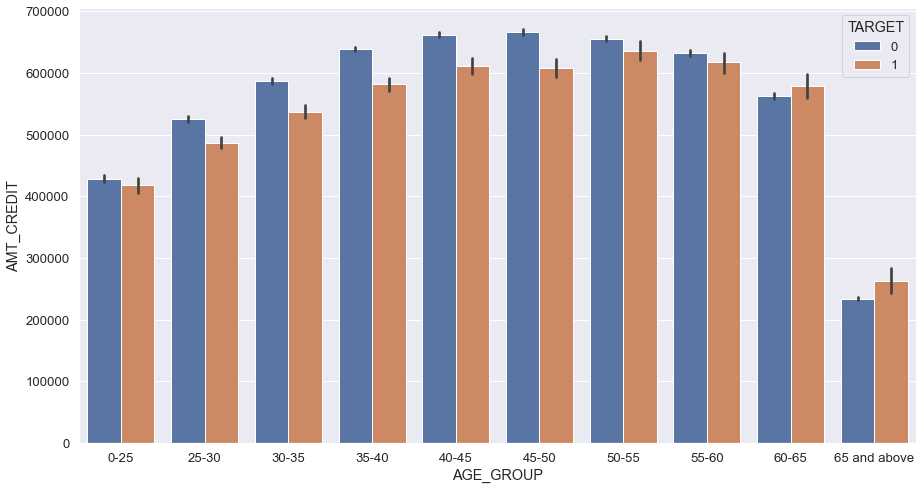

In [54]:
# Plot for AMT-CREDIT vs AGE_GROUP for Non-Defaulters vs Defaulters
plt.figure(figsize=[15,8])
sns.barplot(data= df, y= 'AMT_CREDIT', x= 'AGE_GROUP', hue= 'TARGET')
plt.show()

**For Credit amount majority of the defaulters have age more than 60**

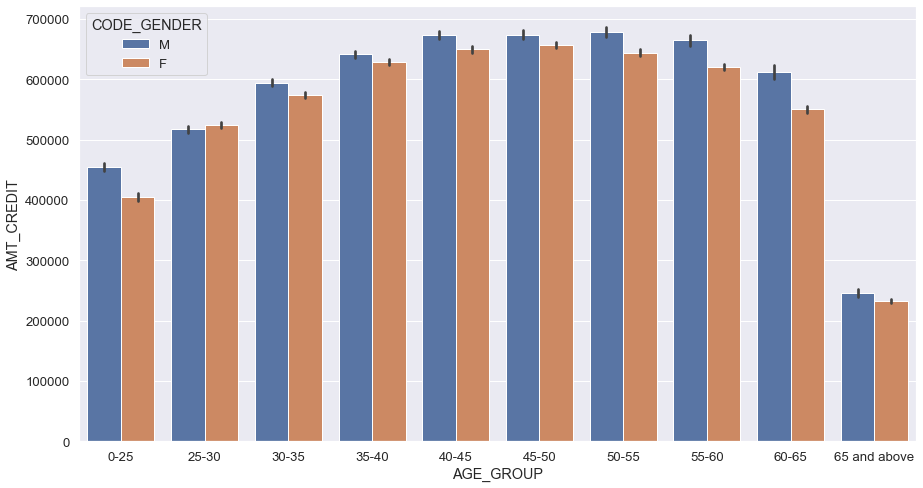

In [55]:
# Plot for AMT-CREDIT vs AGE_GROUP 
plt.figure(figsize=[15,8])
sns.barplot(data= df, y= 'AMT_CREDIT', x= 'AGE_GROUP', hue= 'CODE_GENDER')
plt.show()

**For age group 25-30 the requirement of loan is almost similar for Male & Females**

### Very Important: Since the p-vals are very small, we take a base 10 logarithm and retain there absolute values.

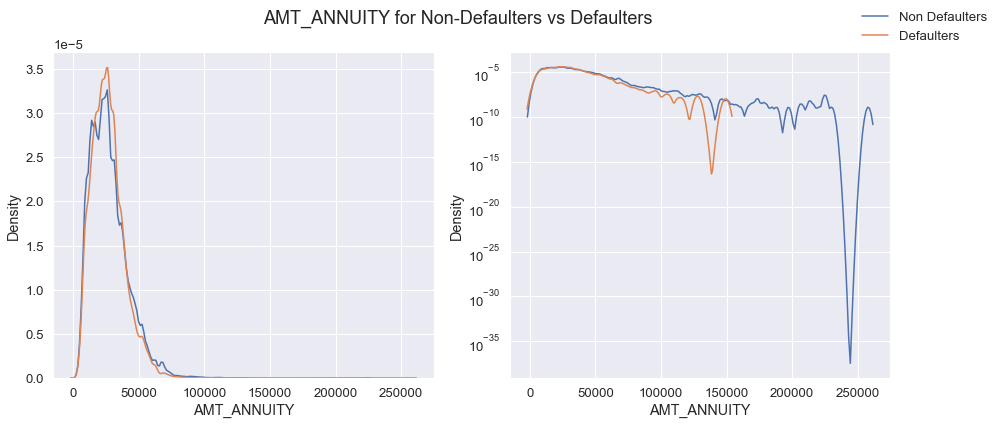

In [56]:
# Distribution plot for AMT_ANNUITY, Non-Defaulters vs Defaulters
fig = plt.figure(figsize=(15,6))
plt.suptitle('AMT_ANNUITY for Non-Defaulters vs Defaulters', fontsize=18)
plt.subplot(1,2,1)
ax1 = sns.distplot(df_non_defaulters.AMT_ANNUITY, hist= False, label='Non Defaulters')
ax1= sns.distplot(df_defaulters.AMT_ANNUITY, hist= False, label='Defaulters')

plt.subplot(1,2,2)
plt.yscale('log')
ax1 = sns.distplot(df_non_defaulters.AMT_ANNUITY, hist= False, label='Non Defaulters')
ax1= sns.distplot(df_defaulters.AMT_ANNUITY, hist= False, label='Defaulters')
fig.legend(labels=['Non Defaulters','Defaulters'], frameon=False)

plt.show()

**Maximum applicants lies between 25K of Range**

**There is a sudden drop in annuity amount for defaulters nearly 140K.** 

**There is a sudden drop in annuity amount for Non-defaulters nearly 245K.**

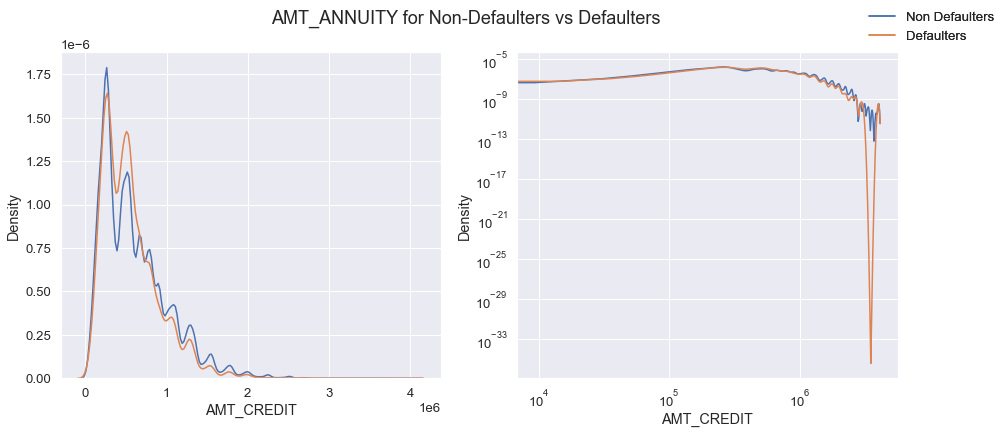

In [57]:
# Distribution plot for AMT_CREDIT, Non-Defaulters vs Defaulters

fig = plt.figure(figsize=(15,6))
plt.suptitle('AMT_ANNUITY for Non-Defaulters vs Defaulters', fontsize=18)

plt.subplot(1,2,1)
ax= sns.distplot(df_non_defaulters.AMT_CREDIT, hist= False, label='Non Defaulters')
ax1= sns.distplot(df_defaulters.AMT_CREDIT, hist= False, label='Defaulters')
fig.legend(labels=['Non Defaulters','Defaulters'], frameon=False)

plt.subplot(1,2,2)
ax= sns.distplot(df_non_defaulters.AMT_CREDIT, hist= False, label='Non Defaulters')
ax1= sns.distplot(df_defaulters.AMT_CREDIT, hist= False, label='Defaulters')
fig.legend(labels=['Non Defaulters','Defaulters'], frameon=False)
plt.yscale('log')
plt.xscale('log')
plt.show()

**Maximum applicants lies between 1.5 M of Range**

**There is a sudden drop in annuity amount for defaulters & Non-defaulters after 1.5 M.** 

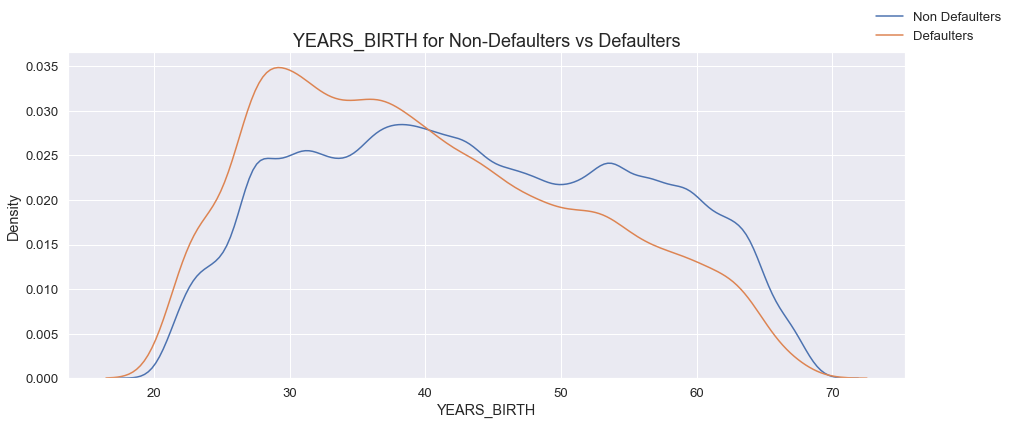

In [58]:
# Distribution plot for YEARS_BIRTH, Non-Defaulters vs Defaulters
fig = plt.figure(figsize=(15,6))
ax1= sns.distplot(df_non_defaulters.YEARS_BIRTH, hist= False, label='Non Defaulters')
ax2= sns.distplot(df_defaulters.YEARS_BIRTH, hist= False, label='Defaulters')
fig.legend(labels=['Non Defaulters','Defaulters'], frameon=False)
plt.title('YEARS_BIRTH for Non-Defaulters vs Defaulters', fontsize=18)
plt.show()

**There are more defaulters under age of 40 where as number of non-defaulters increases after age of 40.**

In [59]:
df.NAME_EDUCATION_TYPE.value_counts()

Secondary     218391
Higher         74863
Incomplete     10277
Lower           3816
Academic         164
Name: NAME_EDUCATION_TYPE, dtype: int64

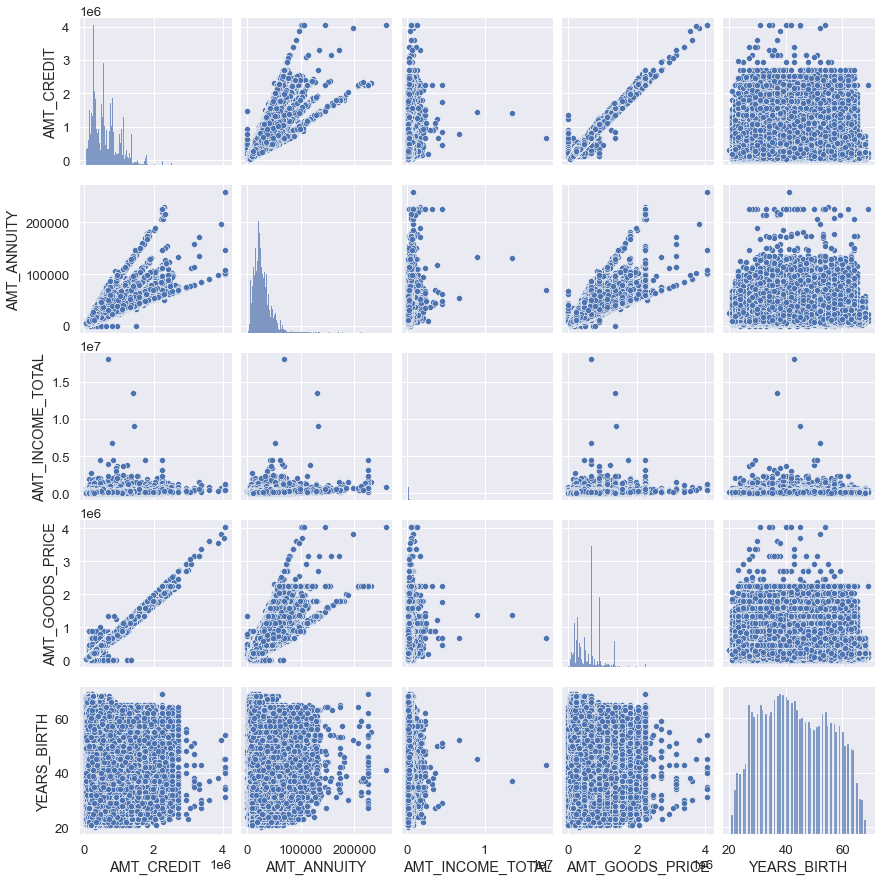

In [60]:
#Pairplot for Non Defaulters
pair = df_non_defaulters[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'YEARS_BIRTH']].fillna(0)
sns.pairplot(pair)
plt.show()

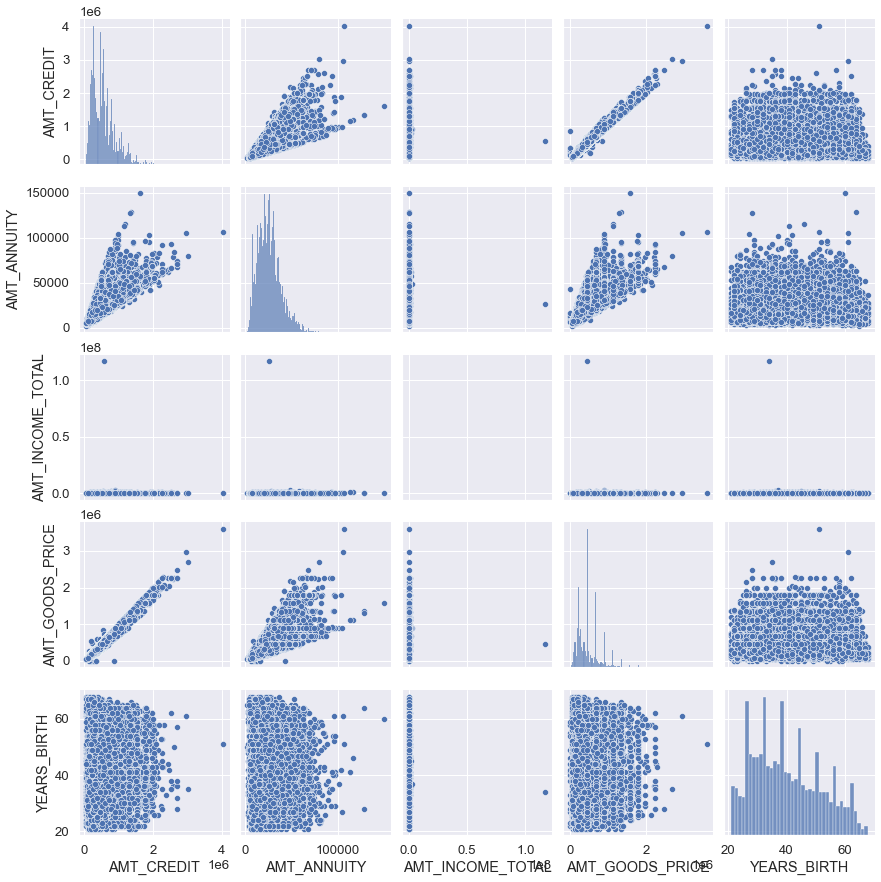

In [61]:
#Pairplot for Defaulters
pair = df_defaulters[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'YEARS_BIRTH']].fillna(0)
sns.pairplot(pair)
plt.show()

## <font color=orange>**For Non Defaulters**</font>

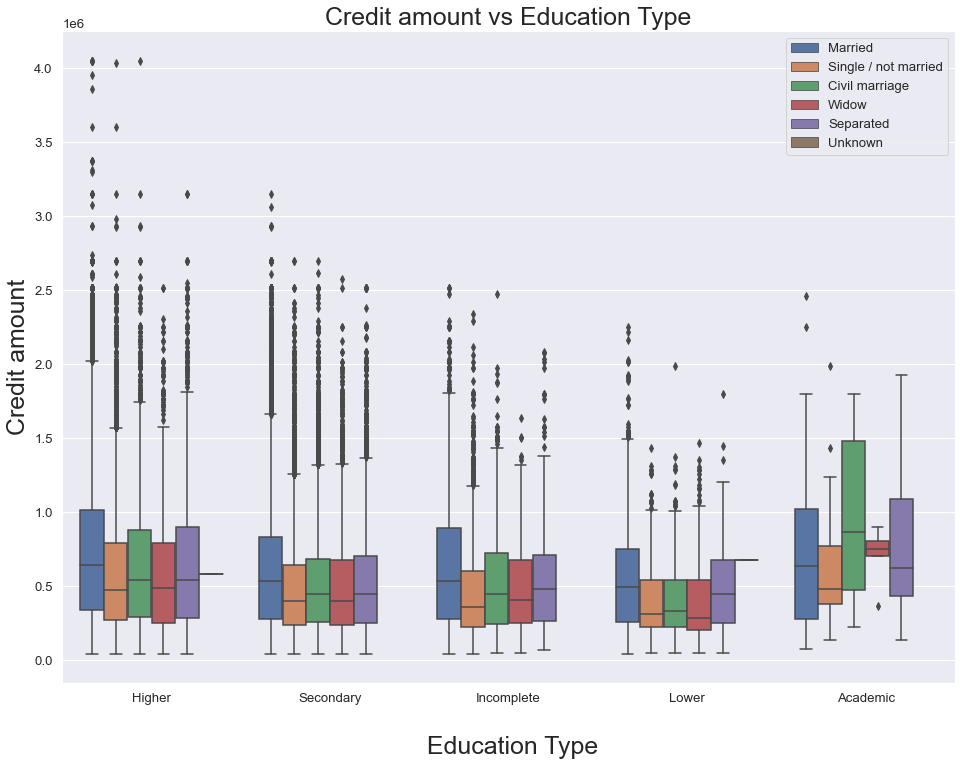

In [62]:
# Box plotting for Credit amount
plt.figure(figsize=(16,12))
plt.xticks(rotation=0)
sns.boxplot(data =df_non_defaulters, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Credit amount vs Education Type', fontsize='xx-large')
plt.xlabel('\n Education Type', fontsize='xx-large')
plt.ylabel('Credit amount', fontsize='xx-large')
plt.legend(loc= 'upper right')
plt.show()

**From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.
Civil marriage for Academic degree is having most of the credits in the third quartile.**

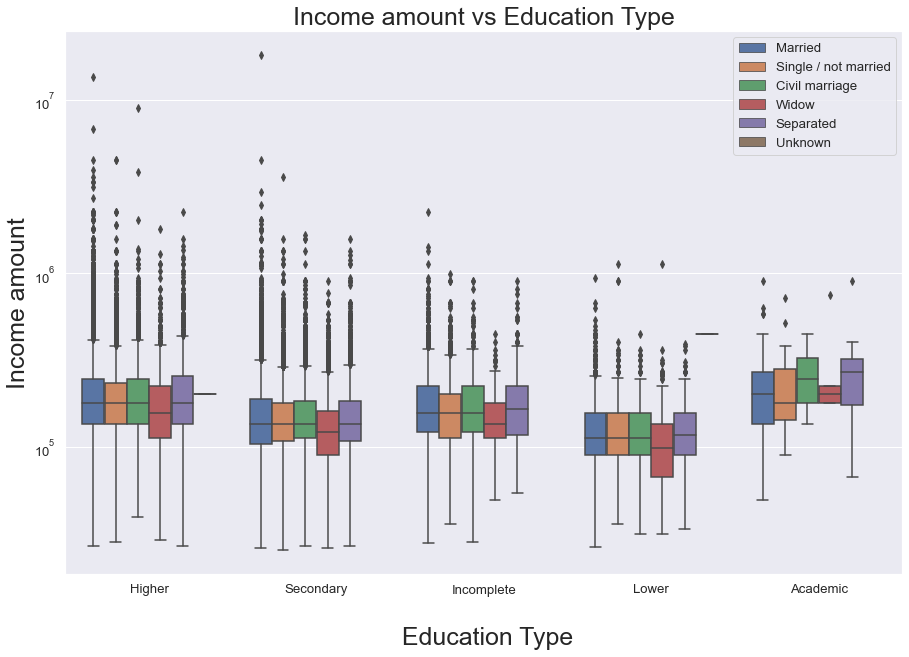

In [63]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(15,10))
plt.xticks(rotation=0)
plt.yscale('log')
sns.boxplot(data =df_non_defaulters, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.title('Income amount vs Education Type', fontsize='xx-large')
plt.xlabel('\n Education Type',fontsize='xx-large')
plt.ylabel('Income amount',fontsize='xx-large')
plt.legend(loc= 'upper right')
plt.show()

**From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary of civil marriage family status are have less income amount than others.**

## <font color=orange>**For Defaulters**</font>

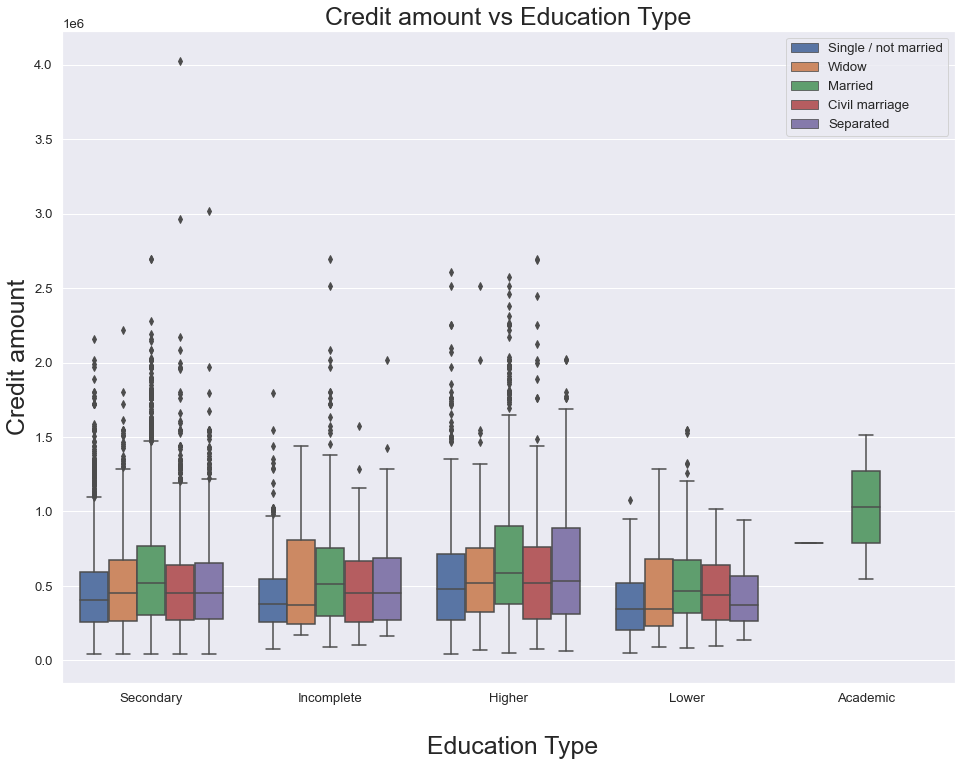

In [64]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=0)
sns.boxplot(data =df_defaulters, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Type', fontsize='xx-large')
plt.xlabel('\n Education Type', fontsize='xx-large')
plt.ylabel('Credit amount', fontsize='xx-large')
plt.legend(loc= 'upper right')
plt.show()

**Quite similar with Non-Defaulters
From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'.
Civil marriage for Academic degree is having most of the credits in the third quartile.**

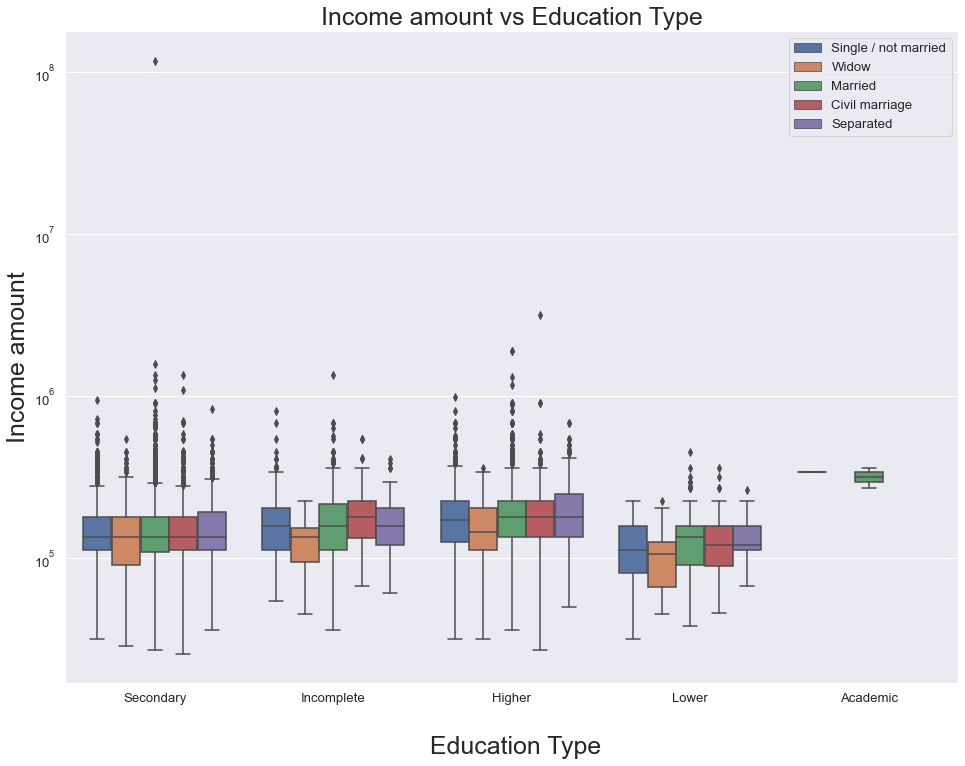

In [65]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=0)
plt.yscale('log')
sns.boxplot(data =df_defaulters, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Type', fontsize='xx-large')
plt.xlabel('\n Education Type',fontsize='xx-large')
plt.ylabel('Income amount',fontsize='xx-large')
plt.legend(loc= 'upper right')
plt.show()

**Have some similarity with Non-Defaulters,
From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary are have less income amount than others.**

In [66]:
df.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count', 'max']})

AMT_INCOME_TOTAL                    \
                                                 mean    median   count   
NAME_EDUCATION_TYPE NAME_INCOME_TYPE                                      
Academic            Pensioner           203919.230769  155700.0      26   
                    Working             246808.695652  225000.0     138   
Higher              Maternity leave     195000.000000  135000.0       3   
                    Pensioner           171455.114974  148500.0    8188   
                    Student             231000.000000  175500.0       6   
                    Unemployed          189000.000000  180000.0       6   
                    Working             213221.410491  180000.0   66660   
Incomplete          Pensioner           149437.155405  135000.0     518   
                    Student             157500.000000  157500.0       1   
                    Unemployed          126000.000000   63000.0       3   
                    Working             183289.323783  157500.0    9755   
Lower               Pensioner           106468.010464   90000.0    1529   
                    Working             145864.995190  135000.0    2287   
Secondary           Maternity leave      58500.000000   58500.0       2   
                    Pensioner           130863.482560  112500.0   45101   
                    Student             138681.818182  144000.0      11   
                    Unemployed           70753.846154   63000.0      13   
                    Working             161491.056407  135000.0  173264   

                                                   
                                              max  
NAME_EDUCATION_TYPE NAME_INCOME_TYPE               
Academic            Pensioner            747000.0  
                    Working              900000.0  
Higher              Maternity leave      360000.0  
                    Pensioner           2250000.0  
                    Student              562500.0  
                    Unemployed           337500.0  
                    Working            13500000.0  
Incomplete          Pensioner            540000.0  
                    Student              157500.0  
                    Unemployed           270000.0  
                    Working             2250000.0  
Lower               Pensioner           1125000.0  
                    Working             1125000.0  
Secondary           Maternity leave       67500.0  
                    Pensioner           1935000.0  
                    Student              225000.0  
                    Unemployed           135000.0  
                    Working           117000000.0

**We can see that most of the loans are taken by working people with secondary education.**

# <font color=orange>Multivariate Analysis</font>

In [67]:
#selecting columns for correlation

cols=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'YEARS_EMPLOYED',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [68]:
defaulters_correlation = round((df_defaulters[cols]).corr(),2)

## <font color=orange>Heat map for Defaulters </font>

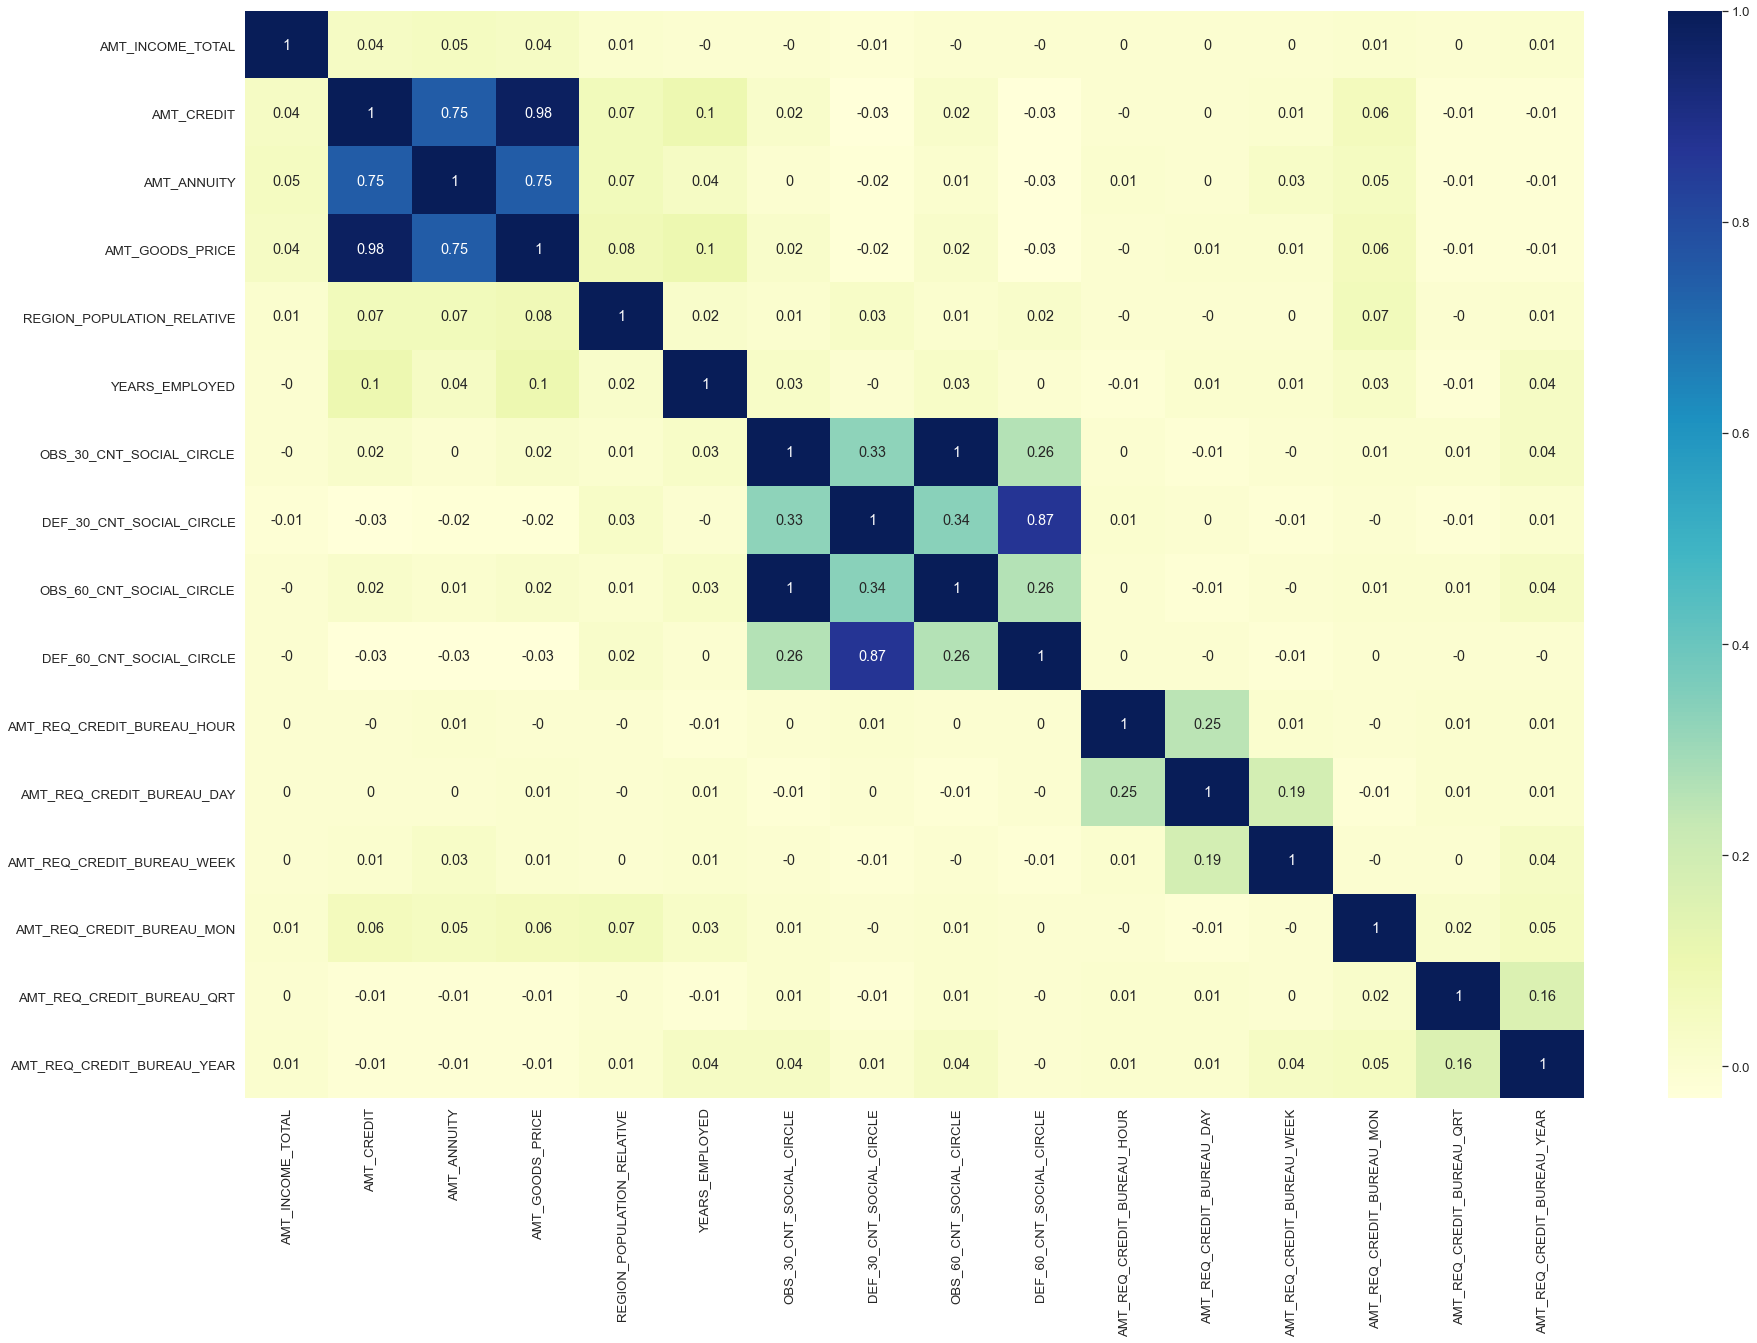

In [69]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(defaulters_correlation, cmap="YlGnBu", annot=True)
plt.show()

#### <font color=orange>**3 most positive correlations**</font>
1. AMT_CREDIT - AMT_GOODS_PRICE
2. CNT_CHILDREN - CNT_FAM_MEMBERS
3. AMT_CREDIT - AMT_ANNUITY

#### <font color=orange>**3 most negative correlations**</font>
1. AMT_CREDIT - AMT_INCOME
2. AMT_REQ_CREDIT_BUREAU_YEAR - AMT_CREDIT
3. REGION_POPULATION_RELATIVE - AMT_GOODS_PRICE

In [70]:
nondefaulters_correlation = round((df_non_defaulters[cols]).corr(),2)

## <font color=orange>Heat map for Non-Defaulters </font>

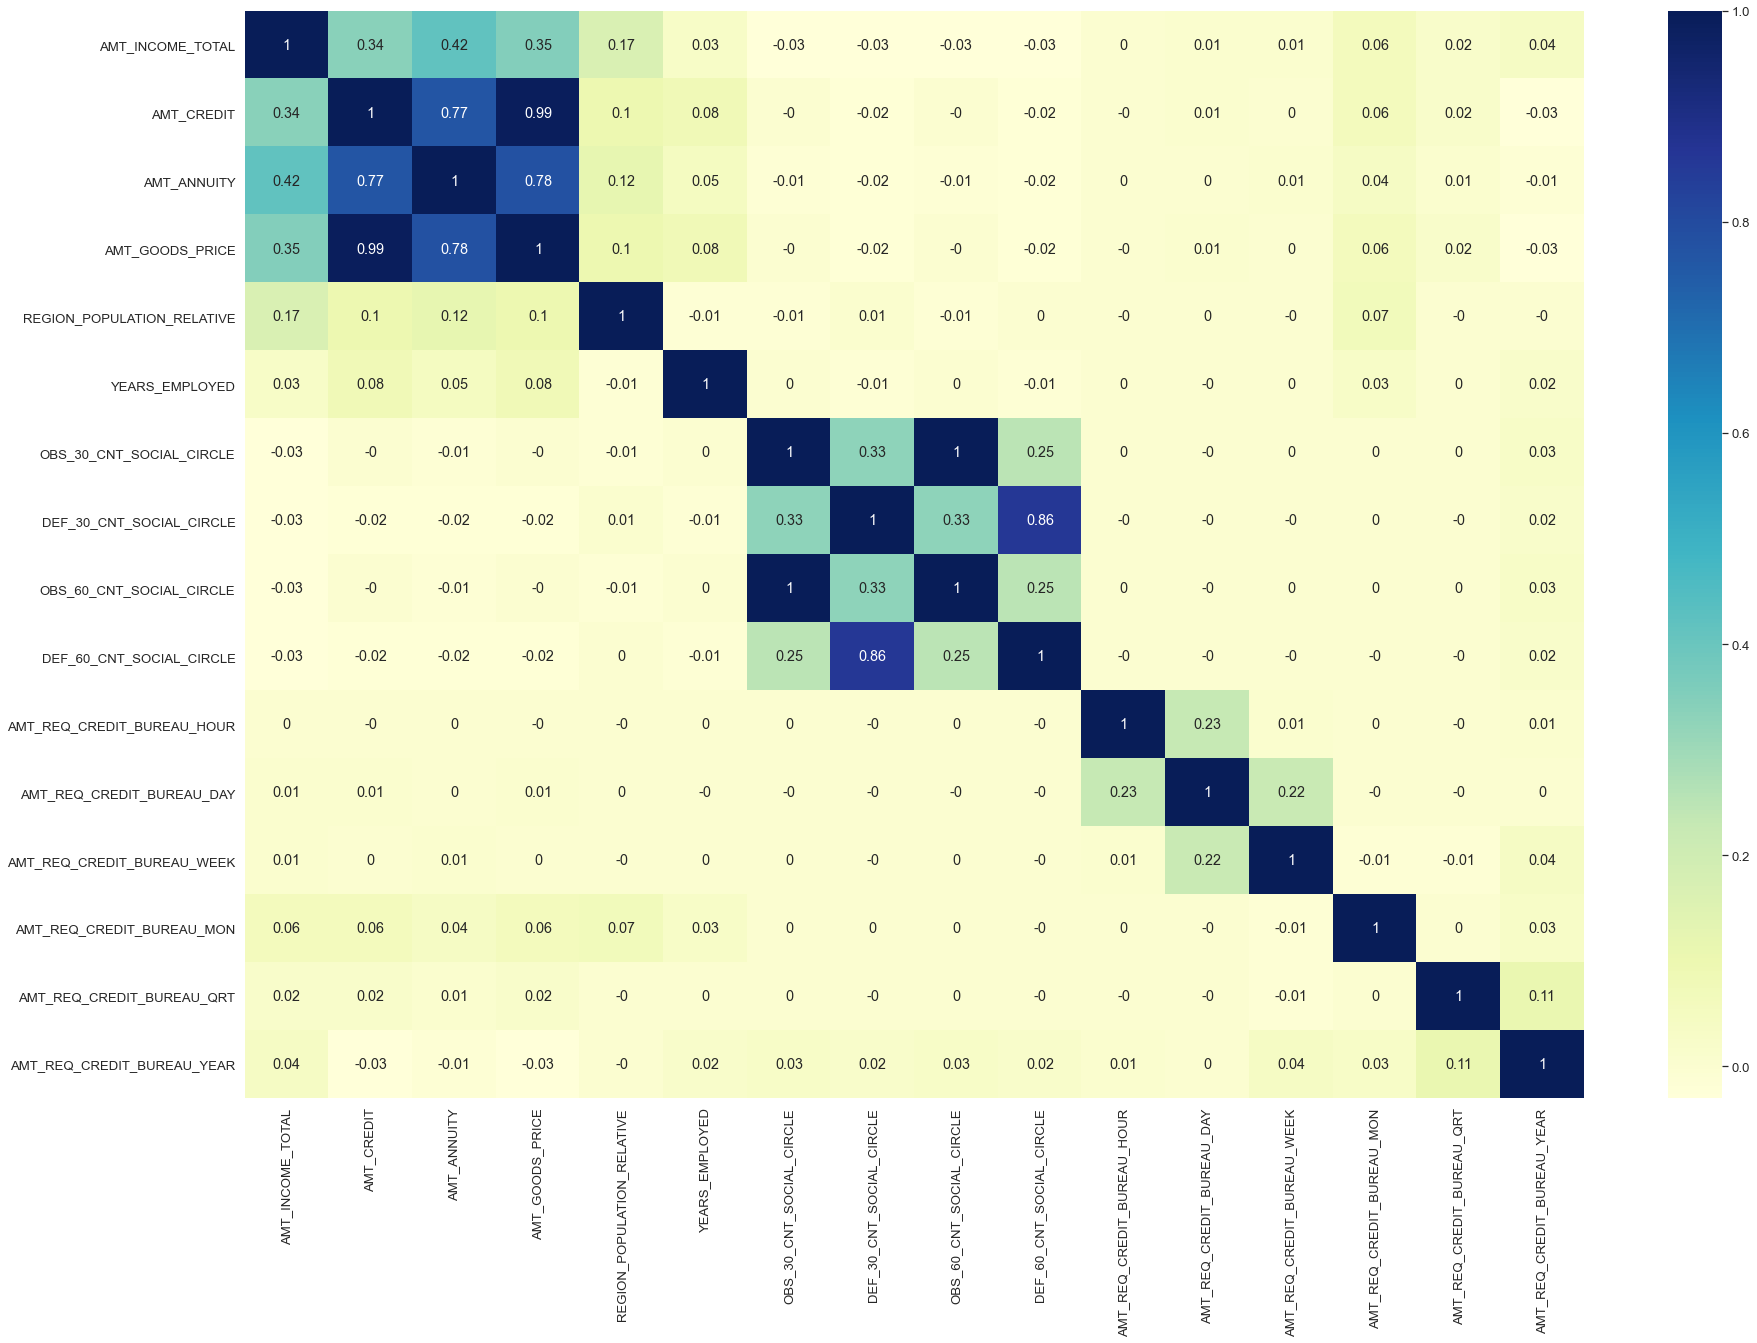

In [71]:
# figure size
plt.figure(figsize=(30,20))
# heatmap
sns.heatmap(nondefaulters_correlation, cmap="YlGnBu", annot=True)
plt.show()

#### <font color=orange>**3 most positive correlations**</font>
1. AMT_CREDIT - AMT_GOODS_PRICE
2. CNT_CHILDREN - CNT_FAM_MEMBERS
3. AMT_CREDIT - AMT_ANNUITY

#### <font color=orange>**3 most negative correlations**</font>
1. AMT_REQ_CREDIT_BUREAU_YEAR - AMT_CREDIT
2. AMT_REQ_CREDIT_BUREAU_YEAR - AMT_GOODS_PRICE
3. REGION_POPULATION_RELATIVE - YEARS_EMPLOYED

In [72]:
df2= pd.read_csv('previous_application.csv')
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df2.shape

(1670214, 37)

<font color=orange>**This dataset for application data has:**</font>
- <font color=orange>**1670214 rows**</font>
- <font color=orange>**37 columns**</font>

In [74]:
df2.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

**<font color = orange>We can see that there are:**</font>
- **<font color = orange>15 columns with dtype = float64**</font>
- **<font color = orange>6 columns with dtype = int64**</font>
- **<font color = orange>16 columns with dtype = object</font>**

In [75]:
prev_meta = meta_data(df2)
prev_meta.head(20)

,Total,Null Percent,Unique,Data_Type
RATE_INTEREST_PRIVILEGED,1664263,99.64,25,float64
RATE_INTEREST_PRIMARY,1664263,99.64,148,float64
AMT_DOWN_PAYMENT,895844,53.64,29278,float64
RATE_DOWN_PAYMENT,895844,53.64,207033,float64
NAME_TYPE_SUITE,820405,49.12,7,object
NFLAG_INSURED_ON_APPROVAL,673065,40.30,2,float64
DAYS_TERMINATION,673065,40.30,2830,float64
DAYS_LAST_DUE,673065,40.30,2873,float64
DAYS_LAST_DUE_1ST_VERSION,673065,40.30,4605,float64
DAYS_FIRST_DUE,673065,40.30,2892,float64


In [76]:
# Dropping Null columns with percentage more than 40%
df2_null_col= df2.isnull().sum()*100/len(df2)
df2_null_col= df2_null_col[df2_null_col.values > 40]
print('Length of Columns with missing data more than 40% is: ',len(df2_null_col))
df2.drop(columns=df2_null_col.index,inplace=True)
df2.shape

Length of Columns with missing data more than 40% is:  11


(1670214, 26)

In [77]:
# XNA and XAP are replaced by NaN
df2=df2.replace('XNA', np.NaN)
df2=df2.replace('XAP', np.NaN)

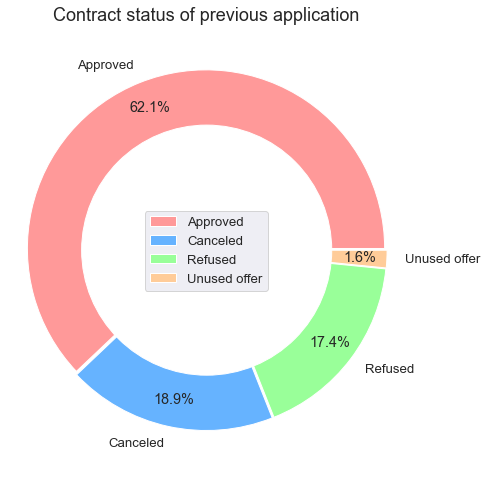

In [78]:
# Distribution of NAME_CONTRACT_STATUS
plt.figure(figsize = (7,7))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax1 = df2['NAME_CONTRACT_STATUS'].value_counts().plot.pie(autopct="%.1f%%",  explode=[0.01]*4, pctdistance=0.85, colors=colors)
plt.title("Contract status of previous application", fontsize= 18)
plt.legend(loc= 'center')

centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.ylabel('')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

**We can observe that majority of loans are approved and very less percentage of loans are unused offer**

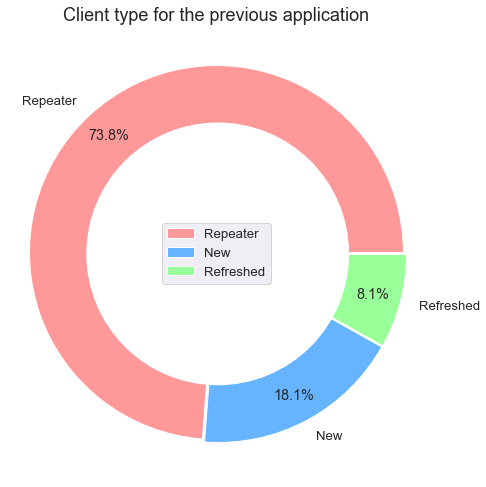

In [79]:
# Distribution of NAME_CLIENT_TYPE
plt.figure(figsize = (7,7))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax1 = df2['NAME_CLIENT_TYPE'].value_counts().plot.pie(autopct="%.1f%%",  explode=[0.01]*3, pctdistance=0.85, colors=colors)
plt.title("Client type for the previous application", fontsize= 18)
plt.legend(loc= 'center')

centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.ylabel('')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

**We observe that majority of applicants are repeaters.**

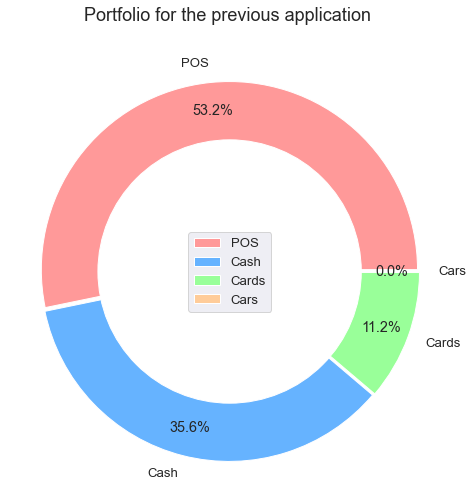

In [80]:
# Distribution of NAME_CLIENT_TYPE
plt.figure(figsize = (7,7))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax1 = df2['NAME_PORTFOLIO'].value_counts().plot.pie(autopct="%.1f%%",  explode=[0.01]*4, pctdistance=0.85, colors=colors)
plt.title("Portfolio for the previous application \n\n", fontsize= 18)
plt.legend(loc= 'center')

centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.ylabel('')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

**We observe that majority of applicants Portfolio's are for POS and a good amount of it is for cash.**

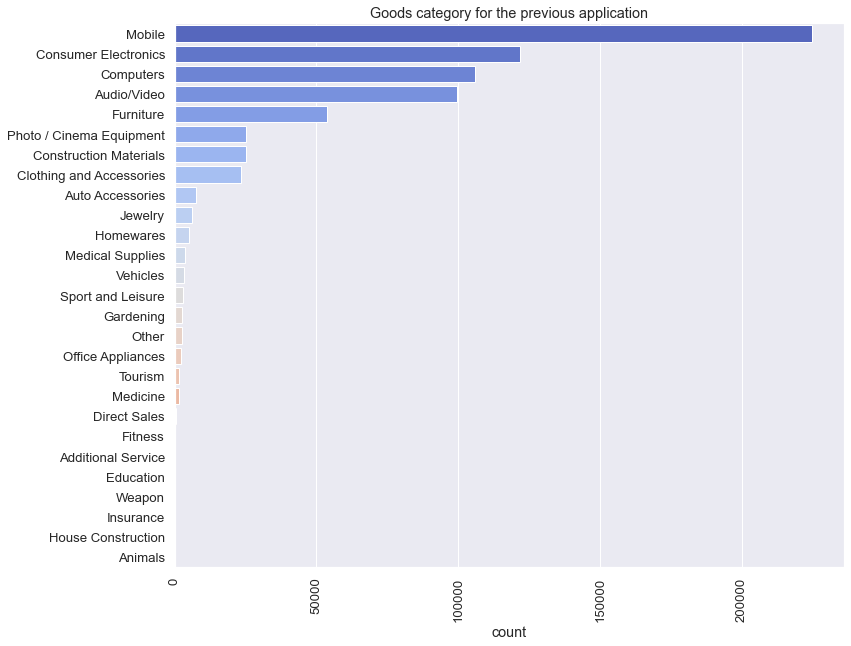

In [81]:
# Countplot for NAME_GOODS_CATEGORY
plt.figure(figsize = (12,10))
plt.xticks(rotation=90)
ax = sns.countplot(data = df2, y= 'NAME_GOODS_CATEGORY', order=df2['NAME_GOODS_CATEGORY'].value_counts().index ,palette="coolwarm") 
plt.title("Goods category for the previous application")
plt.ylabel('')
plt.show()

**We observe that the majority of loans are for mobiles, consumer electronics, computers and furnitures.**

**We observe that the least loans are for Direct sales, Fitness, Additional Service, Education, Weapon, Insurance, Animals & House Construction.**

In [82]:
# Taking SK_ID_CURR and TARGET column from application data for further analysis
df_new=df[['SK_ID_CURR','TARGET']]
df_new.head()

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0


In [83]:
# merging application and previous application data on 'SK_ID_CURR'
df_merge =df_new.merge(df2,on='SK_ID_CURR', how='inner')
df_merge.shape

(1413701, 27)

In [84]:
# Creating two different dataframes for further analysis
df_merge_non_defaulters = df_merge.loc[df_merge["TARGET"]==0]
df_merge_defaulters = df_merge.loc[df_merge["TARGET"]==1]

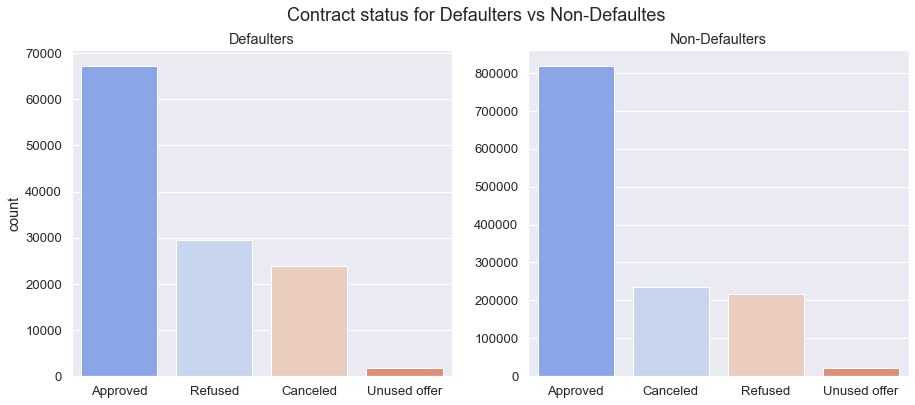

In [85]:
#Contract status for Defaulters vs Non-Defaultes
plt.figure(figsize = (15,6))
plt.suptitle('Contract status for Defaulters vs Non-Defaultes', fontsize= 18)

plt.subplot(1,2,1)
ax = sns.countplot(df_merge_defaulters.NAME_CONTRACT_STATUS ,palette="coolwarm", 
                   order=df_merge_defaulters.NAME_CONTRACT_STATUS.value_counts().index) 
plt.title("Defaulters")
plt.xlabel('')

plt.subplot(1,2,2)
ax1 = sns.countplot(df_merge_non_defaulters.NAME_CONTRACT_STATUS ,palette="coolwarm",
                    order=df_merge_non_defaulters.NAME_CONTRACT_STATUS.value_counts().index) 
plt.title("Non-Defaulters")
plt.ylabel('')
plt.xlabel('')

plt.show()

**Aprox 200K of Non-Defaulter's applications has been canceled which is not appropriate for buisness purpose.**

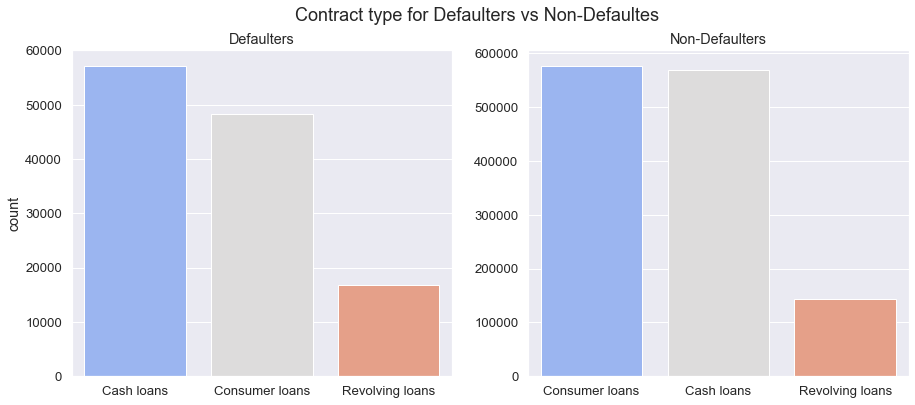

In [86]:
# Contract type for Defaulters vs Non-Defaultes
plt.figure(figsize = (15,6))
plt.suptitle('Contract type for Defaulters vs Non-Defaultes', fontsize= 18)

plt.subplot(1,2,1)
ax = sns.countplot(df_merge_defaulters.NAME_CONTRACT_TYPE ,palette="coolwarm", 
                   order=df_merge_defaulters.NAME_CONTRACT_TYPE.value_counts().index) 
plt.title("Defaulters")
plt.xlabel('')

plt.subplot(1,2,2)
ax1 = sns.countplot(df_merge_non_defaulters.NAME_CONTRACT_TYPE ,palette="coolwarm", 
                    order=df_merge_non_defaulters.NAME_CONTRACT_TYPE.value_counts().index) 
plt.title("Non-Defaulters")
plt.ylabel('')
plt.xlabel('')

plt.show()

**Majority of Defaulters apply for Cash Loans where as Non-Defaulters apply for Consumer Loans**

**Percentage of Revolving Loans are almost similar for both categories.**

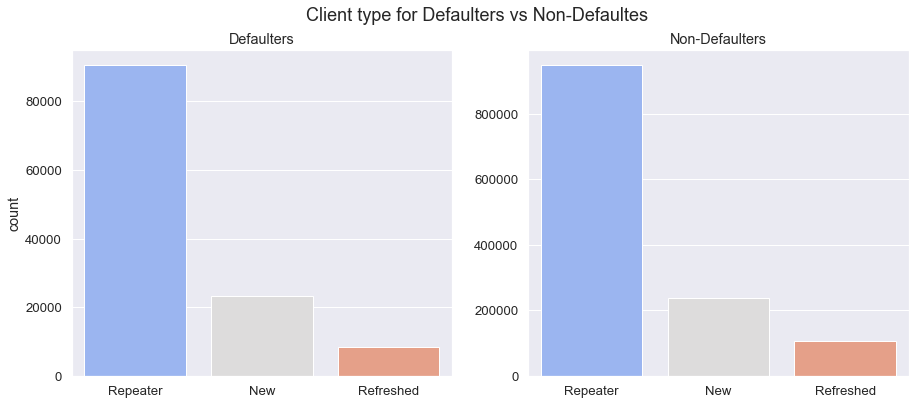

In [87]:
#Client type for Defaulters vs Non-Defaultes
plt.figure(figsize = (15,6))
plt.suptitle('Client type for Defaulters vs Non-Defaultes', fontsize= 18)

plt.subplot(1,2,1)

ax = sns.countplot(df_merge_defaulters.NAME_CLIENT_TYPE ,palette="coolwarm", 
                   order=df_merge_defaulters.NAME_CLIENT_TYPE.value_counts().index) 
plt.title("Defaulters")
plt.xlabel('')

plt.subplot(1,2,2)

ax1 = sns.countplot(df_merge_non_defaulters.NAME_CLIENT_TYPE ,palette="coolwarm",  
                   order=df_merge_non_defaulters.NAME_CLIENT_TYPE.value_counts().index) 
plt.title("Non-Defaulters")
plt.ylabel('')
plt.xlabel('')

plt.show()

**Percentage of Client type for both categories are almost similar/Co-related**

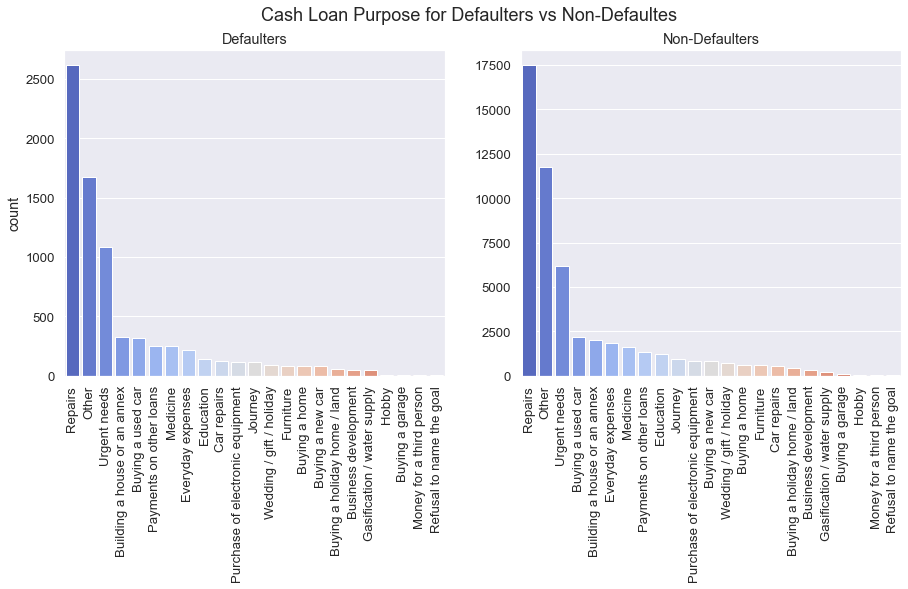

In [88]:
#Cash Loan Purpose for Defaulters vs Non-Defaultes
plt.figure(figsize = (15,6))
plt.suptitle('Cash Loan Purpose for Defaulters vs Non-Defaultes', fontsize= 18)

plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax = sns.countplot(df_merge_defaulters.NAME_CASH_LOAN_PURPOSE, 
                   order=df_merge_defaulters.NAME_CASH_LOAN_PURPOSE.value_counts().index,palette="coolwarm") 
plt.title("Defaulters")
plt.xlabel('')

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax1 = sns.countplot(df_merge_non_defaulters.NAME_CASH_LOAN_PURPOSE, 
                    order=df_merge_non_defaulters.NAME_CASH_LOAN_PURPOSE.value_counts().index,palette="coolwarm") 
plt.title("Non-Defaulters")
plt.ylabel('')
plt.xlabel('')

plt.show()

**

In [89]:
table = pd.pivot_table(df_merge, values='TARGET', 
                       index=['NAME_CLIENT_TYPE'],
                       columns=['NAME_CONTRACT_STATUS'], 
                       aggfunc=np.mean)
table

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CLIENT_TYPE,,,,
New,0.088216,0.145205,0.110940,0.089448
Refreshed,0.065158,0.081098,0.117412,0.074324
Repeater,0.072144,0.091767,0.120596,0.083338


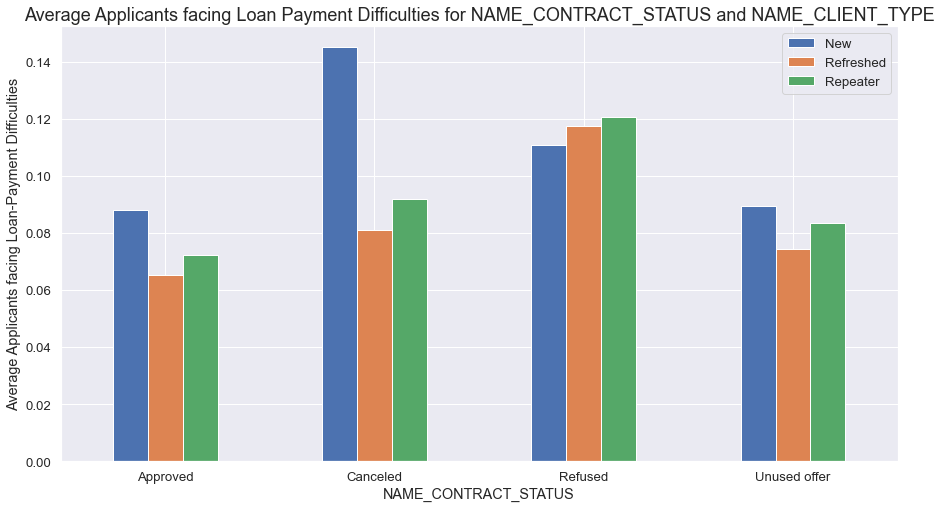

In [90]:
ax = table.T.plot(kind='bar')
ax.set_ylabel('Average Applicants facing Loan-Payment Difficulties')
plt.title('Average Applicants facing Loan Payment Difficulties for NAME_CONTRACT_STATUS and NAME_CLIENT_TYPE', fontsize= 18)
ax.legend(loc= "upper right")
plt.xticks(rotation=0)
fig = ax.get_figure()
fig.set_size_inches(15, 8)
plt.show()

**It can be observed from the above graph that Client who where 'New' and had 'Cancelled' previous application tend to have more % of Loan-Payment Difficulties in current application.**

In [91]:
table1 = pd.pivot_table(df_merge, values='TARGET', 
                        index=['NAME_CONTRACT_TYPE'],
                        columns=['NAME_CONTRACT_STATUS'], 
                        aggfunc=np.mean)
table1

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CONTRACT_TYPE,,,,
Cash loans,0.075516,0.088401,0.12581,0.092593
Consumer loans,0.073853,0.128668,0.10135,0.082337
Revolving loans,0.090343,0.109254,0.12905,0.000000


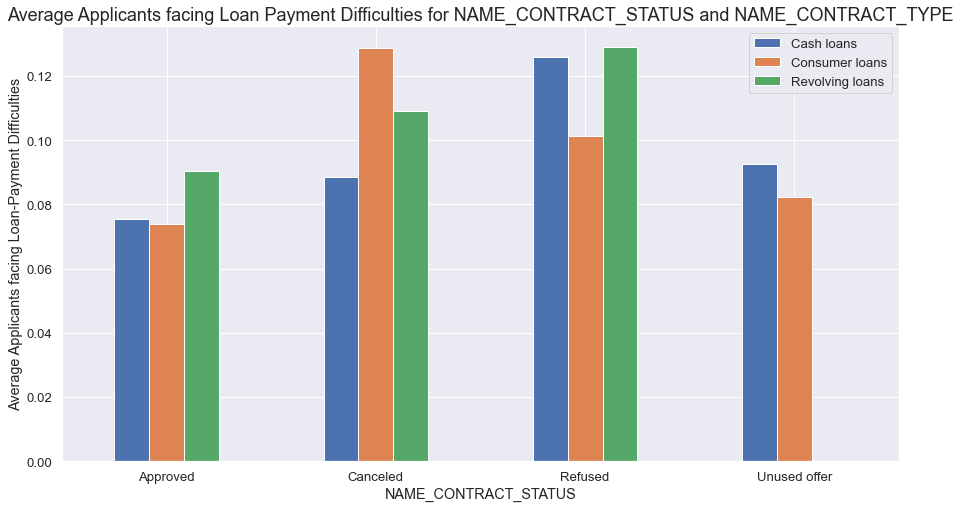

In [92]:
ax = table1.T.plot(kind='bar')
ylab = ax.set_ylabel('Average Applicants facing Loan-Payment Difficulties')
plt.title('Average Applicants facing Loan Payment Difficulties for NAME_CONTRACT_STATUS and NAME_CONTRACT_TYPE',fontsize= 18)
ax.legend(loc= "upper right")
plt.xticks(rotation=0)
fig = ax.get_figure()
fig.set_size_inches(15, 8)
plt.show()

**It can be observed from the above graph that Clients with 'Revolving loans' and with 'Refused' previous application tend to have more % of Loan-Payment Difficulties in current application**

# <font color=orange>Conclusion</font>

**Application Data**

- Client with income type as ‘Maternity leave’ are the driving factors for Loan Defaulters.

- Client with occupation type as ‘Low skilled Laborers’ are the driving factors for Loan Defaulters.

- Cient with education type as ‘Lower Secondary’ are the driving factors for Loan Defaulters.


**Previous Application Data**

- Clients who have ‘Refused’ for cash loan in previous application are the driving factors.

- Clients with contract status as ‘Refused’ in previous application are the driving factors.

- Clients with contract type as ‘Revolving loans’ in previous application are the driving factors.

- Clients with ‘Revolving Loans’ and ‘Refused’ previous application are driving factors.